In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [21]:
data_dir = 'ecg_img' 
train_dir ='ecg_img/train'
test_dir ='ecg_img/test'

In [22]:
train = tf.keras.utils.image_dataset_from_directory('ecg_img/train')
test = tf.keras.utils.image_dataset_from_directory('ecg_img/test')

Found 37178 files belonging to 5 classes.
Found 17435 files belonging to 5 classes.


In [39]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from lenet import LeNet
from keras.optimizers import legacy # 导入Adam优化器

In [67]:
model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(256, 256)),
        # 第一个卷积层, 4 个 21x1 卷积核
        tf.keras.layers.Conv1D(filters=4, kernel_size=21, strides=1, padding='SAME', activation='tanh'),
        # 第一个池化层, 最大池化,4 个 3x1 卷积核, 步长为 2
        tf.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='SAME'),
        # 第二个卷积层, 16 个 23x1 卷积核
        tf.keras.layers.Conv1D(filters=16, kernel_size=23, strides=1, padding='SAME', activation='relu'),
        # 第二个池化层, 最大池化,4 个 3x1 卷积核, 步长为 2
        tf.keras.layers.MaxPool1D(pool_size=3, strides=2, padding='SAME'),
        # 第三个卷积层, 32 个 25x1 卷积核
        tf.keras.layers.Conv1D(filters=32, kernel_size=25, strides=1, padding='SAME', activation='tanh'),
        # 第三个池化层, 平均池化,4 个 3x1 卷积核, 步长为 2
        tf.keras.layers.AvgPool1D(pool_size=3, strides=2, padding='SAME'),
        # 第四个卷积层, 64 个 27x1 卷积核
        tf.keras.layers.Conv1D(filters=64, kernel_size=27, strides=1, padding='SAME', activation='relu'),
        # 打平层,方便全连接层处理'
        tf.keras.layers.Flatten(),
        # 全连接层,128 个节点 转换成128个节点
        tf.keras.layers.Dense(128, activation='relu'),
        # Dropout层,dropout = 0.2
        tf.keras.layers.Dropout(rate=0.2),
        # 全连接层,5 个节点
        tf.keras.layers.Dense(5, activation='softmax')
    ])

In [58]:
# model = LeNet.build(width=256, height=256, depth=3, classes=5)

In [59]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32

In [60]:
opt = legacy.Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [61]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_1 (Conv2D)             (None, 256, 256, 20)      1520      
                                                                 
 activation (Activation)     (None, 256, 256, 20)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 20)      0         
 D)                                                              
                                                                 
 Conv_2 (Conv2D)             (None, 128, 128, 50)      25050     
                                                                 
 activation_1 (Activation)   (None, 128, 128, 50)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 50)        0         
 g2D)                                                 

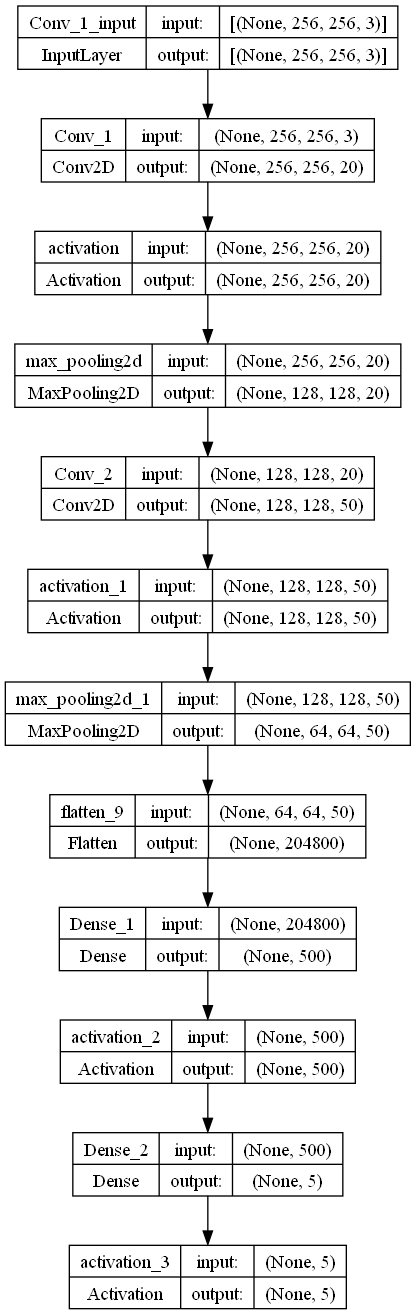

In [62]:
import pydot
import graphviz
import keras
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.utils import plot_model

# 将模型结构保存为图片
plot_model(model, to_file='Flatten.png', show_shapes=True)

In [63]:
logdir='logs'

In [64]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [65]:
# 训练与验证
hist = model.fit(train, epochs=20, callbacks=[tensorboard_callback])

Epoch 1/20


  74/1162 [>.............................] - ETA: 14:19 - loss: 396.4538 - accuracy: 0.5541

KeyboardInterrupt: 